# Validation dataset for the Newton correlation
Function: $\mathrm{F_g}(m_1,m_2,\mathbf{x}) = \frac{G m_1 m_2}{(x_1 - x_2)^2 + (y_1 - y_2)^2 + (z_1 - z_2)^2}$

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))
from Regression.dataset import InvarianceDataset
from Regression.model import InvarianceModel
from Regression.detector import InvarianceDetector

warnings.filterwarnings("ignore", category=DeprecationWarning)

## Reads the noisy dataset

In [2]:
xlsx_path = "../../Data/Newton Noise.xlsx"
df = pd.read_excel(xlsx_path)

In [3]:
dataset = InvarianceDataset(df, "Fg")

In [4]:
# show a quick summary and the head of the dataframe
print("\nDataFrame summary (first 5 rows):\n")
print(dataset.head())

# show descriptive statistics
print("\nDescriptive statistics:\n")
print(dataset.summary())


DataFrame summary (first 5 rows):

                   m1                  m2            x1            y1  \
0   71637906693614000  878527962523509504 -2.334345e+11 -4.904289e+10   
1  796495271110801408  778305898100410112  3.748268e+11  7.007697e+11   
2   33682284540871900  356963121846750272 -3.624984e+11  3.664268e+11   
3  949630314058041344  318071787373914880  9.632184e+11 -9.771324e+11   
4  999005747398294144  580057644023181440  4.044914e+11  7.536374e+11   

             z1            x2            y2            z2         Fg  
0 -4.510814e+11  8.608649e+11  8.928771e+10  1.959175e+10   3.383076  
1  5.265932e+11 -9.509090e+11  7.648018e+11  3.181249e+11  22.939019  
2 -6.297389e+10 -3.195579e+11  9.293181e+11 -2.005018e+11   2.399679  
3 -7.262999e+11  1.513139e+11 -6.224523e+11  8.388566e+11   5.736802  
4  5.132920e+11  8.665535e+11 -8.205346e+11 -3.606682e+10  12.744414  

Descriptive statistics:

                 m1            m2            x1            y1            

## DNN model

In [5]:
X_train, X_test, y_train, y_test = dataset.train_test_split()

In [6]:
# Initialize the DNN model
model = InvarianceModel(input_dim=8)

In [7]:
# Build and compile the DNN model
model.build_and_compile(X_train)

### Train the model if not saved already

In [8]:
# Train the model
checkpoint_filepath = './tmp/checkpoint_newton.weights.h5'
model_filepath = './tmp/checkpoint_newton.keras'
model.train(X_train, y_train, checkpoint_path=checkpoint_filepath, model_path=model_filepath)

Epoch 1/200
181/181 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 9.1652 - val_loss: 7.0435
Epoch 2/200
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.4478 - val_loss: 6.2629
Epoch 3/200
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.5032 - val_loss: 5.2017
Epoch 4/200
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.5188 - val_loss: 4.3039
Epoch 5/200
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.6641 - val_loss: 3.4683
Epoch 6/200
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.9610 - val_loss: 2.8677
Epoch 7/200
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.5226 - val_loss: 2.5321
Epoch 8/200
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.2528 - val_loss: 2.4016
Epoch 9/200
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.0655 - val_loss: 2.0975
Epoch 10/200
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.9459 - val_loss: 2.1012
Epoch 11/200
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.8825 - val_loss: 2.0212
Epoch 12/200
181/181 ━━━━━━━━━━━━━━━━━━━━

In [9]:
# Save training history
history_filepath = './tmp/checkpoint_newton.pkl'
model.save_history(history_filepath)

### Otherwise, load trained model

In [10]:
# Reload model and history
history_filepath = './tmp/checkpoint_newton.pkl'
history = model.load_history(history_filepath)

model_filepath = './tmp/checkpoint_newton.keras'
model.load_model(model_filepath)

### Model metrics

In [11]:
# Evaluate on test set
r2, mae, rmse = model.evaluate(X_test, y_test)

print(f"R² = {r2:.3f}")
print(f"MAE = {mae:.3f}")
print(f"RMSE = {rmse:.3f}")

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
R² = 0.970
MAE = 1.280
RMSE = 2.262


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


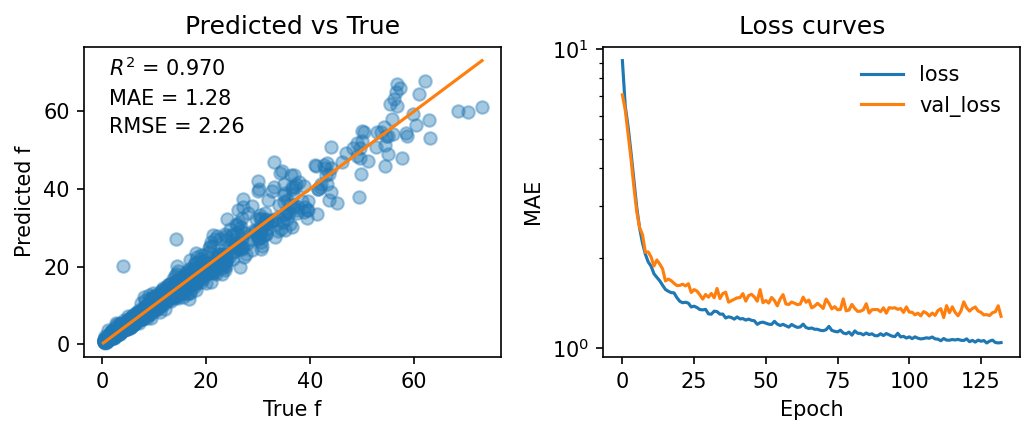

In [12]:
delta = max(y_test) - min(y_test)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3), dpi=150)
test_predictions = model.predict(X_test)

# Scatter predicted vs true
ax1.scatter(y_test, test_predictions, alpha=0.4)
p1 = max(max(test_predictions), max(y_test))
p2 = min(min(test_predictions), min(y_test))
ax1.plot([p1, p2], [p1, p2], "C1")
ax1.annotate(f"$R^2$ = {r2:.3f}", xy=(0.02 * delta, 0.95 * delta))
ax1.annotate(f"MAE = {mae:.2f}", xy=(0.02 * delta, 0.85 * delta))
ax1.annotate(f"RMSE = {rmse:.2f}", xy=(0.02 * delta, 0.75 * delta))
ax1.set_xlabel("True f")
ax1.set_ylabel("Predicted f")
ax1.set_title("Predicted vs True")

# Loss curves
ax2.plot(history['loss'], label='loss')
ax2.plot(history['val_loss'], label='val_loss')
ax2.set_yscale('log')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('MAE')
ax2.legend(frameon=False)
ax2.set_title("Loss curves")

plt.tight_layout()
plt.show()

## Invariance detection
This section performs feature grouping analysis using combinations of two and three features.

The analysis aims to detect invariant groups of features in the form 
- ${\alpha_1}x_i + {\alpha_2}x_j$ for pairs,
- ${\alpha_1}x_i + {\alpha_2}x_j + {\alpha_3}x_k$ for triplets.

In [13]:
# Load the pre-trained model
model = InvarianceModel(input_dim=8)
model_filepath = './tmp/checkpoint_newton.keras'
model.load_model(model_filepath)

In [14]:
# List of features
feature_names = dataset.feature_names
feature_names

['m1', 'm2', 'x1', 'y1', 'z1', 'x2', 'y2', 'z2']

### Initialize the Detector

In [15]:
detector = InvarianceDetector()

### Look for pairs

In [17]:
res = detector.find_invariant_pairs(dataset, model, 0.5, -0.5, mode='sum')

100%|██████████| 28/28 [00:39<00:00,  1.41s/it]


In [18]:
pd.options.display.float_format = '{:.4f}'.format
print(res)

   feature_pair  mean_a  std_a  mean_b  std_b
0      (m1, m2)  0.6433 0.0000 -0.7656 0.0000
1      (m1, x1) -0.0000 0.0000 -1.0000 0.0000
2      (m1, y1)  0.0000 0.0000 -1.0000 0.0000
3      (m1, z1)  0.0000 0.0000 -1.0000 0.0000
4      (m1, x2)  0.0000 0.0000 -1.0000 0.0000
5      (m1, y2) -0.0000 0.0000 -1.0000 0.0000
6      (m1, z2)  0.0000 0.0000 -1.0000 0.0000
7      (m2, x1) -0.0000 0.0000 -1.0000 0.0000
8      (m2, y1)  0.0000 0.0000 -1.0000 0.0000
9      (m2, z1) -0.0000 0.0000 -1.0000 0.0000
10     (m2, x2)  0.0000 0.0000 -1.0000 0.0000
11     (m2, y2)  0.0000 0.0000 -1.0000 0.0000
12     (m2, z2)  0.0000 0.0000 -1.0000 0.0000
13     (x1, y1)  0.6233 0.3176 -0.1041 0.7069
14     (x1, z1)  0.5657 0.4500 -0.2945 0.6251
15     (x1, x2)  0.7093 0.0237 -0.7041 0.0218
16     (x1, y2)  0.3473 0.6006 -0.5399 0.4765
17     (x1, z2)  0.5086 0.4101 -0.4334 0.6207
18     (y1, z1)  0.0524 0.7513 -0.5497 0.3615
19     (y1, x2)  0.4106 0.4867 -0.1920 0.7468
20     (y1, y2)  0.7096 0.0296 -0.

In [ ]:
detector.plot_results(figsize=(6,3), dpi=300)